<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">

## Random Variables & Discrete Probability Distributions



### LEARNING OBJECTIVES
By the end of this lesson, students should be able to:
- Define distribution and random variable.
- Describe the difference between discrete and continuous random variables.
- Understand the difference between probability mass functions and cumulative distribution functions.
- Give examples of the following distributions: Discrete Uniform, Bernoulli, Binomial, and Poisson.

## Definitions

---

An **experiment** is an infinitely-repeatable procedure with a [well-defined](https://en.wikipedia.org/wiki/Well-defined) set of outcomes.
- I flip a coin twice.
- I roll a die once.

The **sample space** for a given experiment is the set of all possible outcomes of that experiment.
- I flip a coin twice: $\{\{H,H\}, \{T,H\}, \{H,T\}, \{T,T\}\}$
- I roll a die once: $\{1, 2, 3, 4, 5, 6\}$

A **random variable** is a function from a sample space $S$ to the real numbers.
- Let $X$ be the number of heads I observe. Then, $X$ can take on the values 0, 1, or 2.
- I roll a die **once**. Then, $Y$ can take on the values 1, 2, 3, 4, 5, 6.

There are two categories of random variables: **discrete random variables** and **continuous random variables**.

### Discrete random variables

Discrete random variables have outcomes which are "countable". The two examples of random variables used above are discrete because I can list out all values of the random variable.

The number of heads in a series of coin flips, for example, or the number of aces drawn in a series of hands from a deck of cards. Each discrete outcome has an associated probability of occurring.

For discrete random variables, the distribution of the probabilities of each outcome is called the **probability mass function (pmf)**.

### Continuous random variables

Continuous random variables, on the other hand, have outcomes which are not countable. Say, for example, $T$ is a random variable representing the temperature at noon. There are not exact temperature outcomes with associated probabilities of occurrence – the number of outcomes is infinite. The probabilities of _ranges of values_ are calculated as areas under the **probability density function (pdf)**, which is the probability function associated with continuous variables.

## Recap
1. We first run an experiment.
2. We then observe results of the experiment.
3. Our random variable $X$ will map the results of the experiment to a real number.
4. We will then study the **distribution** of $X$.

**Check:** What is a distribution?

### Importing libraries

For this lecture, we'll need to import the following libraries:
- `numpy`, which we'll alias as `np`
- `matplotlib.pyplot`, which we'll alias as `plt`
- `scipy.stats`, which we'll alias as `stats`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Discrete Distributions!

## The discrete uniform distribution

---

**Example**: I roll a fair die once. What is the distribution of outcomes?

The **discrete uniform distribution** is used when we have a **discrete set of outcomes** and **each outcome is equally likely**.

For example, imagine we roll a fair die. The outcome of rolling the die is represented by a random variable $X$, which can take on values 1 through 6.

The probability mass function $f$ over the six possible outcomes $x$, each with an associated probability $p$, is defined as:

$$  f(x|p) =
    \begin{cases}
    1/6 & \text{for }x=1 \\ 
    1/6 & \text{for }x=2 \\
    1/6 & \text{for }x=3 \\
    1/6 & \text{for }x=4 \\
    1/6 & \text{for }x=5 \\
    1/6 & \text{for }x=6 \\
    0 & \text{elsewhere } \\
    \end{cases}
$$

This is an example of the **discrete uniform distribution** because all of the outcomes have the same probability. 

If you plot the probability mass function (often abbreviated $pmf$), you can see that the probability histogram is uniform (flat).

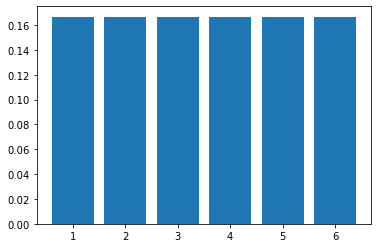

In [2]:
die_sides = list(range(1,7))
die_probs = [1/6] * 6

plt.bar(die_sides, die_probs);

#### The cumulative distribution function (CDF)

Continuing with the die example, we can also plot out the **cumulative probability** of our six outcomes. This is known as the **cumulative distribution function** (often abbreviated $cdf$). We can get this by starting at the minimum possible outcome, then add the probability of each outcome. Thus, each point on a cumulative distribution function represents the probability that a random variable is less than or equal to that value.

In a formula, if the $pmf$ is given by $f(x) = P(X = x)$, we write the $cdf$ as $F(x) = P(X \leq x)$.

In [3]:
# np cumulative sum example
np.cumsum([1, 2, 3, 4])

array([ 1,  3,  6, 10], dtype=int32)

In [4]:
np.cumsum(die_probs) # Cummulative probability of die roll

array([0.16666667, 0.33333333, 0.5       , 0.66666667, 0.83333333,
       1.        ])

In [5]:
list(zip(die_probs, np.cumsum(die_probs)))

[(0.16666666666666666, 0.16666666666666666),
 (0.16666666666666666, 0.3333333333333333),
 (0.16666666666666666, 0.5),
 (0.16666666666666666, 0.6666666666666666),
 (0.16666666666666666, 0.8333333333333333),
 (0.16666666666666666, 0.9999999999999999)]

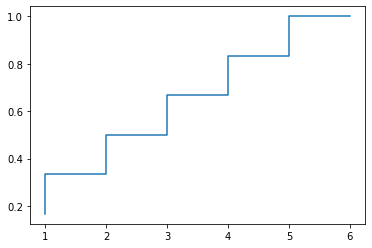

In [6]:
plt.step(die_sides,
         np.cumsum(die_probs))
plt.xticks(die_sides);

We can simultaneously visualize the probability density/mass function and the cumulative distribution function [here](http://students.brown.edu/seeing-theory/).

### Practice: Deck of cards
---

A deck of cards contains the values Ace-King. How would we represent these as a random variable (**remember, each value needs to map to the number line**)?

Plot the probability mass function (pmf) of drawing a single value (Ace-King) from a fair deck.

In [7]:
sample_space = ["A", 2, 3, 4, 5, 6, 7, 8, 9, 10, "J", "Q", "K"] # Sample Space
card_values = [card+1 for card in range(13)] # Random Variable
card_probs = [1/13 for number in range(13)] # probability of drawing each card

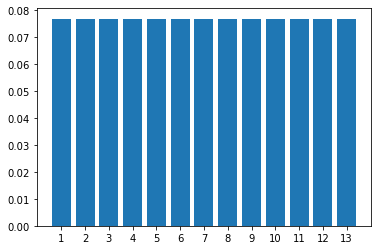

In [8]:
card_values = list(range(1,14))
card_probs = [1/13] * 13

plt.bar(x=card_values, height=card_probs)
plt.xticks(card_values);

What is the probability of drawing a 6 or less (assume Ace is low)?

In [9]:
# one way
6/13

0.46153846153846156

In [10]:
# Second way - using np.cumsum()
np.cumsum(card_probs)[5]

0.46153846153846156

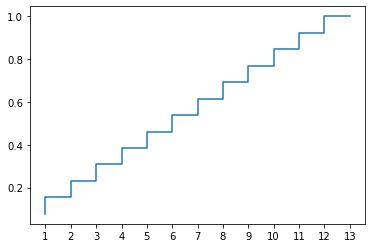

In [11]:
# Plot the CDF
plt.step(card_values, np.cumsum(card_probs))
plt.xticks(card_values);

## The Bernoulli distribution

---

**Example**: I flip a coin with some fixed probability of success $p$. What's the likelihood that I flip heads?

When to use this distribution:

- When your outcome is binary (i.e., two outcomes, say, `1 = success` and `0 = failure`)
- When there is a constant probability of success $p$.

Parameters of this distribution:

- probability of success $p$

Some common examples of a Bernoulli random variable:

- A coin flip.
- Whether or not it will rain tomorrow.
- Whether a user will buy your product after visiting your website.

Bernoulli distributed variables are very common and will appear continually throughout the course, especially in   classification.

#### Bernoulli pmf

The probability mass function $f$ for outcomes $x$ and probabilities $p$ is:

$$  f(x|p) =
    \begin{cases}
    p & \text{for }x=1 \\
    1-p & \text{for }x=0 \\ 
    0 & \text{elsewhere} \\
    \end{cases}
$$

In the cell below, let's plot the pmf of an unfair coin-flip, where $p = 0.25$.

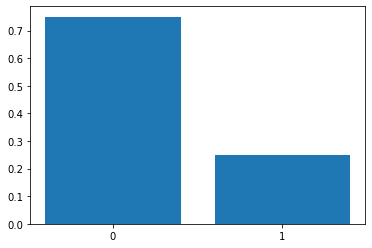

In [12]:
sample_space = ["T", "H"] # Sample space (for referrence)
coin_outcomes = [0, 1]
coin_probs = [1 - .25, .25]

plt.bar(coin_outcomes, coin_probs)
plt.xticks(coin_outcomes);

#### Bernoulli CDF

Its cumulative distribution function is also defined as a function of $x$ outcomes with $p$ probabilities:

$$ F(x|p) =
\begin{cases}
    0 & \text{for }x<0 \\ 1 - p & \text{for }0 \leq x < 1 \\ 1 & \text{for }x\geq 1
\end{cases} $$

In [13]:
np.cumsum(coin_probs) # Bernoulli CDF (not that useful...)

array([0.75, 1.  ])

### Practice: Election outcomes
---

Candidate A is ahead in the polls. She has a 63% chance of winning the election. Plot the Bernoulli distribution of Candidate A's chances as a bar chart.

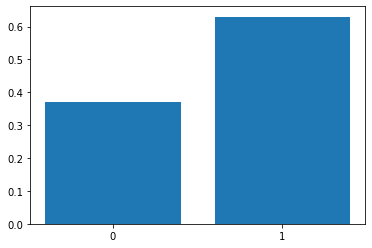

In [14]:
["Lose", "Win"] # This is the sample space!
election_outcomes = [0, 1]
election_probs = [1 - .63, .63]

plt.bar(election_outcomes,
        election_probs)
plt.xticks(election_outcomes);

<a id='bernoulli'></a>

## The Binomial distribution

---

**Example**: I flip a coin with some fixed probability of success $p$. I flip the same coin $k$ times. What is the proability of getting a certain number of heads?

The binomial distribution is directly related to the Bernoulli distribution: it is **the sum of successes of a Bernoulli distributed random variable.**

When it's used:

- when you have fixed $n$ independent Bernoulli trials.

More explicitly:

- when you have fixed $n$ trials,
- each trial is independent of one another,
- when you have a constant probability of success $p$, and
- when you have a binary outcome.

Parameters of the distribution:

- probability of success $p$
- number of trials $n$
 

#### Binomial pmf

The $pmf$ is a function of $n$ trials with $p$ probability of success and $x$ successes in those trials:

$$ f(x|n,p) = P(X = x) = \binom n x  p^x(1-p)^{n-x} $$

where

$$\binom n x = \frac{n!}{x! (n-x)!}$$

Which describes the probability that there will be $x$ successes in $n$ trials.

Below is the binomial pmf for 50 coin flips of a coin with probability of getting heads at 25%.


In [15]:
p_heads = .25
n_flips = 50

coin_dist = stats.binom(n_flips, p_heads)

In [16]:
# What is the probability of getting 10 heads in 50 coin flips?
coin_dist.pmf(10)

0.09851840993941652

In [17]:
# What is the probability of getting 0 heads in 50 coin flips?
coin_dist.pmf(0)

5.663216564269385e-07

In [18]:
# What is the probability of getting 50 heads in 50 coin flips?
coin_dist.pmf(50)

7.888609052210105e-31

In [19]:
coin_dist.pmf([0, 10, 50]) # the pmf also takes a list of successes!

array([5.66321656e-07, 9.85184099e-02, 7.88860905e-31])

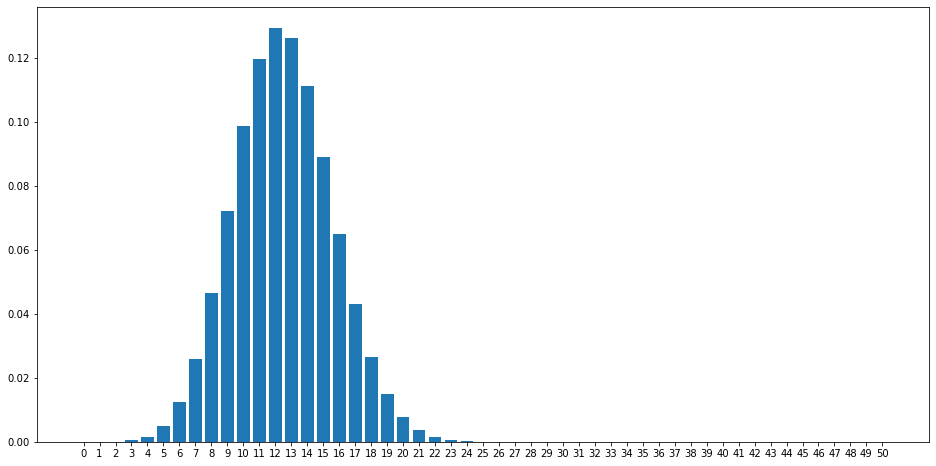

In [20]:
possible_heads = [heads for heads in range(51)] # Random Variable (possible heads flips)
heads_probs = coin_dist.pmf(possible_heads)

# Plot the Binomial PMF

plt.figure(figsize=(16, 8))
plt.bar(possible_heads, heads_probs)
plt.xticks(possible_heads);

#### Binomial cdf

In [21]:
# What is the probability of getting 10 OR FEWER heads flips in 50 flips?
coin_dist.cdf(10)

0.2622023101895092

In [22]:
# Do it "manually"
np.cumsum(coin_dist.pmf(possible_heads))[10]

0.26220231018950857

In [23]:
# What is the probability of getting 25 OR FEWER heads flips in 50 flips?
coin_dist.cdf(25)

0.9999619784950493

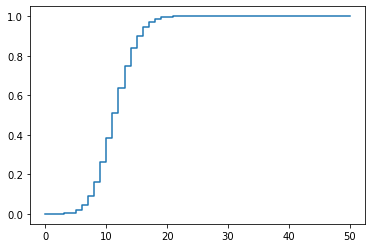

In [24]:
plt.step(possible_heads,
         coin_dist.cdf(possible_heads));

### Practice: Elections
---

Candidate A is now leading the polls at 55%. If we survey 100 people at random, plot a **pmf** of all possible outcomes as a bar chart.

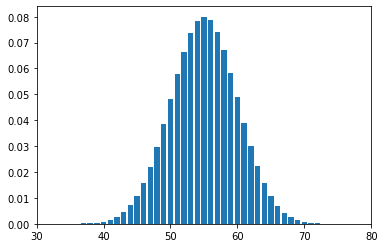

In [25]:
p_election = .55
n_surveys = 100

survey_distn = stats.binom(n_surveys, p_election)

survey_outcomes = list(range(0, 101))
plt.bar(survey_outcomes,
        survey_distn.pmf(survey_outcomes))
plt.xlim(30, 80); # limit the numbers on the X-axis!

## The Poisson distribution

---

The Poisson distribution represents the counts of "positive" events, or successes, within a time span. It shares a relationship with Bernoulli random variables and the Binomial distribution. 

A Bernoulli random variable represents the probability that an event will occur during a "trial". Imagine we had a Bernoulli random variable that was the probability of a user visiting our site between 12pm and 1pm. If we change this to be between 12pm and 12:15pm, this remains a Bernoulli random variable but the probability has decreased. As the time frame shrinks, the probability shrinks as well.

The Poisson distribution represents infinitely many infinitely small probability trials. Our number of trials $n$ increases to infinity and the probability of success $p$ shrinks towards zero in a specific way. 

More formally, if we take the Binomial distribution and examine its behavior when $n\rightarrow\infty$ and $p\rightarrow 0$, we get the Poisson distribution.

When we use this:

- when the number of successes is is a non-negative integer,
- when events occur independently,
- when the rate at which events occur is constant,
- when two events cannot occur at exactly the same instant, and
- the probability of an event occurring in an interval is proportional to the length of the interval.

Parameters of the distribution:

- rate of event occurring $\lambda$

#### Poisson pmf

$$f(x|\lambda) = P(X=x) = \frac{\lambda^x e^{-\lambda}}{x!} $$

Where $x$ is the number of events that occur in an interval,

and $\lambda$ is the rate at which events occur.

Let's say, for example, we are measuring visitors to our website. What is the probability mass function of the Poisson distribution for visitor counts given we have an average rate of 5 visitors per hour?

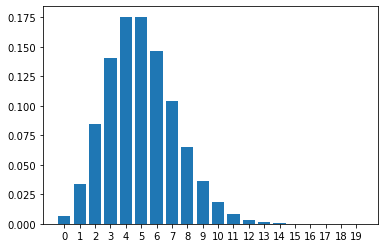

In [26]:
n_visitors = 5

visitor_distn = stats.poisson(n_visitors)

possible_visitors = list(range(20))
plt.bar(possible_visitors,
        visitor_distn.pmf(possible_visitors))
plt.xticks(possible_visitors);

In [27]:
# What is the probability of getting 9 visitors in the next hour?
visitor_distn.pmf(9)

0.036265577415643714

In [28]:
# What is the probability of getting 5 visitors in the next hour?
visitor_distn.pmf(5)

0.17546736976785068

In [29]:
# What is the probability of getting 1 visitors in the next hour?
visitor_distn.pmf(1)

0.03368973499542734

#### Poisson cdf

The cumulative distribution is given by the formula:

### $$ e^{-\lambda} \sum_{i=0}^{\lfloor x\rfloor} \frac{\lambda^i}{i!} $$

Where the $\lfloor x\rfloor$ represents the greatest integer less than or equal to $x$.

In [30]:
# What is the probability of getting 5 OR FEWER visitors
visitor_distn.cdf(5)

0.615960654833063

In [31]:
# What is the probability of getting 6 OR MORE visitors
1 - visitor_distn.cdf(5)

0.38403934516693705

In [32]:
# What is the probability of getting 7 OR FEWER visitors
visitor_distn.cdf(7)

0.8666283259299925

In [33]:
# What is the probability of getting 8 OR MORE visitors
1 - visitor_distn.cdf(7)

0.1333716740700075

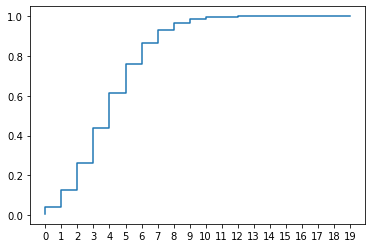

In [34]:
plt.step(possible_visitors,
         visitor_distn.cdf(possible_visitors))
plt.xticks(possible_visitors);

## Conclusion

By the end of this lesson, students should be able to:
- Define distribution and random variable.
- Describe the difference between discrete and continuous random variables.
- Understand the difference between probability mass functions and cumulative distribution functions.
- Give examples of the following distributions: Discrete Uniform, Bernoulli, Binomial, and Poisson.

<details>
<summary>What is a distribution?</summary>
<li> A distribution is the set of all values of a variable and how frequently we observe them.
</details>
<br>
<details>
<summary>What is a random variable?</summary>
<li> A random variable is a function that takes our sample space $\mathcal{S}$ and maps it to the real number line.
</details>
<br>
<details>
<summary>What is the difference between a discrete and continuous random variable?</summary>
<li> A discrete random variable has a countable sample space; a continuous random variable has a sample space that is not countable.
</details>
<br>
<details>
<summary>What is the difference between a probability mass function and a cumulative distribution function? </summary>
<li> A probability mass function gives us the probability of that particular value of the random variable occurring. The cumulative mass function gives us the probability of that particular value and all values below it.
</details>
<br>
<details>
<summary>What is the Discrete Uniform distribution? </summary>
<li> The discrete uniform distribution is appropriate for an experiment where all outcomes are equally likely.
<li> Examples include:
<ul>
<li> the number of heads tossed with one coin (0 and 1 both occur 50% of the time)
<li> the value rolled with one die (numbers 1 through 6 each occur exactly 1/6 of the time)
</ul>
</details>
<br>
<details>
<summary>What is the Bernoulli distribution? </summary>
<li> The Bernoulli distribution is appropriate for an experiment with two outcomes and a fixed probability of success $p$.
<li> Examples include:
<ul>
<li> the number of heads tossed with one coin (0 and 1 both occur 50% of the time)
<li> the number of correct answers a randomly guessing person gets on one multiple choice question with four choices (1 occurs 25% of the time; 0 occurs 75% of the time)
</ul>
</details>
<br>
<details>
<summary>What is the Binomial distribution? </summary>
<li> The Binomial distribution is appropriate for a sum of Bernoulli random variables, or where we have $n$ independent experiments with two outcomes and a fixed probability of success $p$.
<li> Examples would include:
<ul>
<li> the number of heads tossed with $n$ coins
<li> the number of correct answers a randomly guessing person gets on on $n$ multiple choice questions with four choices each
</ul>
</details>
<br>
<details>
<summary>What is the Poisson distribution? </summary>
<li> Whereas the Binomial distribution is appropriate for an experiment counting the number of successes out of a fixed number of trials, the Poisson distribution is appropriate for an experiment counting the number of successes in a fixed interval.
<li> Getting into the theory, if we took a Binomial distribution, let the number of trials $n$ go to infinity, and the probability of success $p$ approach 0, then we get a Poisson distribution.
<li> Examples would include:
<ul>
<li> the number of calls received at a call center in five minutes
<li> the count of people who go to my website in one day
</ul>
</details>



# Additional content

## Other Discrete Distributions

### Hypergeometric

The [hypergeometric distribution](https://en.wikipedia.org/wiki/Hypergeometric_distribution) with parameters $M$, $n$, and $N$ describes the probability of drawing exactly $k$ successes across $N$ draws _without replacement_ from a total of $M$ objects, $n$ of which are successes. It is implemented in scipy [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.hypergeom.html).

The hypergeometric distribution is similar to the binomial distribution, but without replacement.

Example: A bag contains 13 marbles, 6 of which are blue. Consider the experiment of drawing 5 marbles; in this case, the number of blue marbles contained in the group you drew is a random variable distributed as $\text{HyperGeom}(M=13, n=6, N=5)$

**Q:** If $X \sim \text{HyperGeom}(M,n,N)$, what are all the possible values of X?

**A:** `0,...,min(n,N)`

**Q:** If a committee of 6 people is chosen uniformly at random from a pool of 20 people consisting of 11 women and 9 men, what is the probability that the number of women on the committee is less than 2?

In [59]:
# Your code here
M = 20 # number of people in pool
n = 11 # number of women/number of "successes" in pool
N = 6 # number of people chosen for the committee
hyper = stats.hypergeom(M, n, N)
hyper.cdf(1)

0.03792569659442731

## Properties of distributions

### Expected value and Variance

Let $X$ be a discrete R.V. with pmf $f(x)$

The _expected value_ of X  is defined as $$\text{E}[X] = \sum_x x \cdot f(x)$$

More generally, the expected value of a function of X is $$\text{E}[g(X)] = \sum_x g(x) \cdot f(x)$$



The _variance_ of X is defined as $$V(X) = \text{E}\left[\left(X - \text{E}(X)\right)^2 \right] = \text{E}[X^2] - E[X]^2$$

**Q:** Compute the **expected value** and **variance** of the following discrete random variables

$X \sim \text{Binomial}(n=10, p=0.2) $

In [82]:
# Your code here
dist = stats.binom(10, .2)
possible_values = np.array(range(0,11))
ev = (possible_values * dist.pmf(possible_values)).sum()
print('ev:',ev)
# Or, simply
# dist.expect()


var = (possible_values**2 * dist.pmf(possible_values)).sum() - ev**2
print('var:',var)
# Or, simply
# dist.var()

ev: 2.0000000000000013
var: 1.5999999999999996


$X \sim \text{HyperGeom}(M=10, n=4, M=7)$

In [84]:
# Your code here
dist = stats.hypergeom(10, 4, 7)
possible_values = np.array(range(5))
ev = (possible_values * dist.pmf(possible_values)).sum()
print('ev:',ev)
# Or, simply
# print(dist.expect())


var = (possible_values**2 * dist.pmf(possible_values)).sum() - ev**2
print('var:',var)
# Or, simply
# print(dist.var())

ev: 2.799999999999998
var: 0.5600000000000023


### Entropy

The entropy of X is defined as
$$ H(X) = - \sum_x f(x)\log(f(x))$$ 

Compute the entropy of $\text{Binom}(n=10, p)$ for $p$ in $[0.1, 0.2, 0.5, 0.8, 0.9]$.  

**Q:** For which values of p is the number of successes the most uncertain? (If you aren't certain, graph the histograms.)  For which values of p is the entropy the largest?

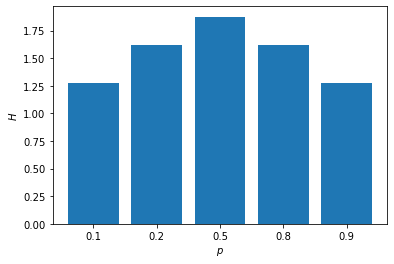

In [103]:
ps = [0.1, 0.2, 0.5, 0.8, 0.9]
H = []
possible_values = np.array(range(11))
# Your code here
for p in ps:
    dist = stats.binom(10, p)
    H.append(-(dist.pmf(possible_values) * np.log(dist.pmf(possible_values))).sum())

plt.bar(range(1,6), H)
plt.xticks(range(1,6),ps)
plt.xlabel(r'$p$')
plt.ylabel(r'$H$');

In [ ]:
# p=0.5 yields the largest entropy